# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [7]:
import pandas as pd
import numpy as np


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [12]:


file_path = 'appl_1980_2014.csv'




### Step 3. Assign it to a variable apple

In [15]:
apple = pd.read_csv(file_path)
print(apple)

            Date   Open   High    Low  Close     Volume  Adj Close
0     2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35
1     2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2     2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
3     2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
4     2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
...          ...    ...    ...    ...    ...        ...        ...
8460  1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
8461  1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
8462  1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
8463  1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
8464  1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45

[8465 rows x 7 columns]


### Step 4.  Check out the type of the columns

In [16]:
print(apple.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


### Step 5. Transform the Date column as a datetime type

In [18]:
apple['Date'] = pd.to_datetime(apple['Date'])

print(apple.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


### Step 6.  Set the date as the index

In [19]:
apple.set_index('Date', inplace=True)

print(apple)

             Open   High    Low  Close     Volume  Adj Close
Date                                                        
2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
...           ...    ...    ...    ...        ...        ...
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45

[8465 rows x 6 columns]


### Step 7.  Is there any duplicate dates?

In [25]:

duplicates = apple.duplicated(subset=['Date'])

if duplicates.any():
    print("Duplicate dates found in the 'Date' column.")
else:
    print("No duplicate dates found in the 'Date' column.")

No duplicate dates found in the 'Date' column.


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [34]:
apple = pd.read_csv(file_path)
apple['Date'] = pd.to_datetime(apple['Date'])

apple.set_index('Date', inplace=True)

apple.sort_index(ascending=True, inplace=True)

print(apple)

             Open   High    Low  Close     Volume  Adj Close
Date                                                        
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
...           ...    ...    ...    ...        ...        ...
2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35

[8465 rows x 6 columns]


### Step 9. Get the last business day of each month

In [35]:
last_business_day_per_month = apple.resample('BM').last()

print(last_business_day_per_month)

              Open    High     Low   Close     Volume  Adj Close
Date                                                            
1980-12-31   34.25   34.25   34.13   34.13    8937600       0.53
1981-01-30   28.50   28.50   28.25   28.25   11547200       0.44
1981-02-27   26.50   26.75   26.50   26.50    3690400       0.41
1981-03-31   24.75   24.75   24.50   24.50    3998400       0.38
1981-04-30   28.38   28.62   28.38   28.38    3152800       0.44
...            ...     ...     ...     ...        ...        ...
2014-03-31  539.23  540.81  535.93  536.74   42167300      76.25
2014-04-30  592.64  599.43  589.80  590.09  114160200      83.83
2014-05-30  637.98  644.17  628.90  633.00  141005200      90.43
2014-06-30   92.10   93.73   92.09   92.93   49482300      92.93
2014-07-31   96.27   96.80   93.92   95.35   65130000      95.35

[404 rows x 6 columns]


### Step 10.  What is the difference in days between the first day and the oldest

In [38]:
first_date = apple.index[0]
oldest_date = apple.index[-1]

difference_in_days = (oldest_date - first_date).days

print(f"The difference in days between the first and oldest dates is: {difference_in_days} days.")

The difference in days between the first and oldest dates is: 12261 days.


### Step 11.  How many months in the data we have?

In [39]:
number_of_months = apple.resample('M').size()

print("Number of months in the data:", len(number_of_months))

Number of months in the data: 404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

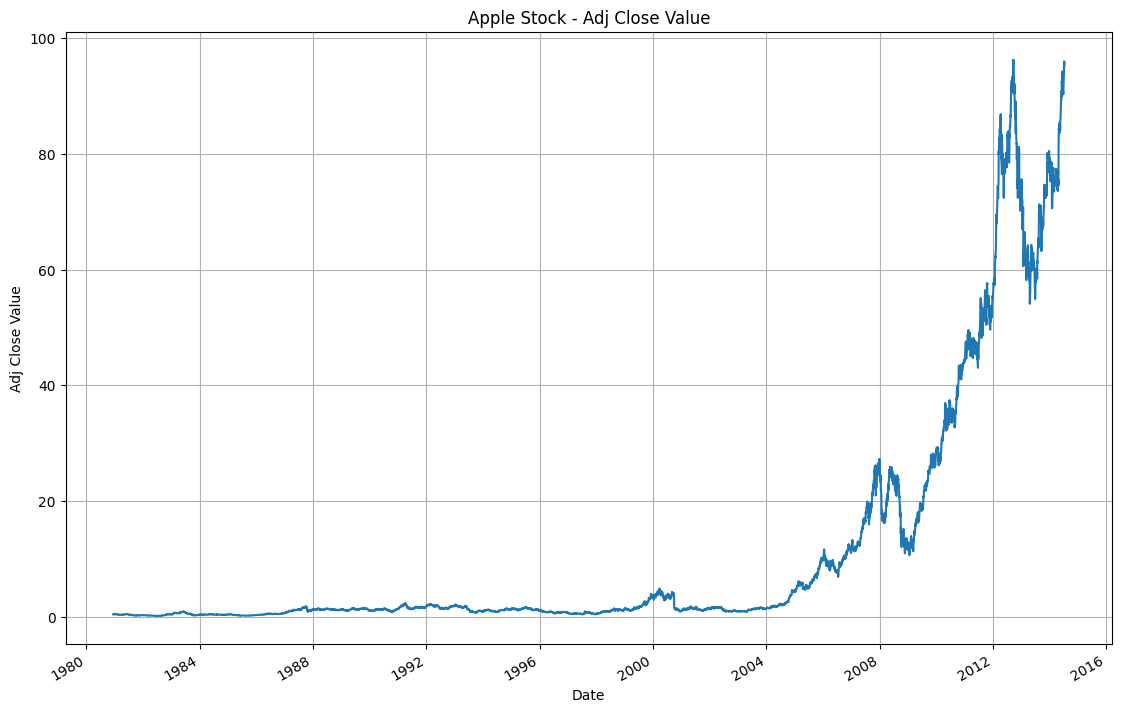

In [40]:
import matplotlib.pyplot as plt

apple['Adj Close'].plot(figsize=(13.5, 9))

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Adj Close Value')
plt.title('Apple Stock - Adj Close Value')

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


### BONUS: Create your own question and answer it.

### What was the highest closing price (Adj Close) of the Apple stock on July 8th, 2014?

In [41]:
closing_price_july_8_2014 = apple.loc['2014-07-08', 'Adj Close']

print("The highest closing price (Adj Close) of the Apple stock on July 8th, 2014 was:", closing_price_july_8_2014)

The highest closing price (Adj Close) of the Apple stock on July 8th, 2014 was: 95.35
